<a href="https://colab.research.google.com/github/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/blob/main/Fraud_Review_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import os, zipfile
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import folium
from folium import Choropleth
import plotly.express as px
import mapclassify
import matplotlib.patches as mpatches

In [94]:
! wget -q -O Bank_Account_or_Service_Complaints.zip https://github.com/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/raw/refs/heads/main/Data/Bank_Account_or_Service_Complaints.zip
zip_ref = zipfile.ZipFile('Bank_Account_or_Service_Complaints.zip', 'r'); zip_ref.extractall(); zip_ref.close()
review = pd.read_csv('Bank_Account_or_Service_Complaints.csv')

In [95]:
review.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
1,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
2,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,TX,75025,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468981
4,07/29/2013,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,CA,96088,NaN,NaN,Web,08/01/2013,Closed with explanation,Yes,No,469185


In [96]:
review["Sub-product"].unique()

array(['Checking account', 'Other bank product/service',
       '(CD) Certificate of deposit', 'Savings account',
       'Cashing a check without an account'], dtype=object)

In [97]:
review.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [98]:
cust_rev = review[['Date received', 'Sub-product', 'Issue','Consumer complaint narrative', 'Company public response', 'Company',
       'State']]

In [99]:
! wget -q -O usa.zip https://github.com/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/raw/refs/heads/main/Data/National_Obesity_By_State-shp.zip
zip_ref = zipfile.ZipFile('usa.zip', 'r'); zip_ref.extractall(); zip_ref.close()
usa_shp = gpd.read_file('National_Obesity_By_State.shp')

<Axes: >

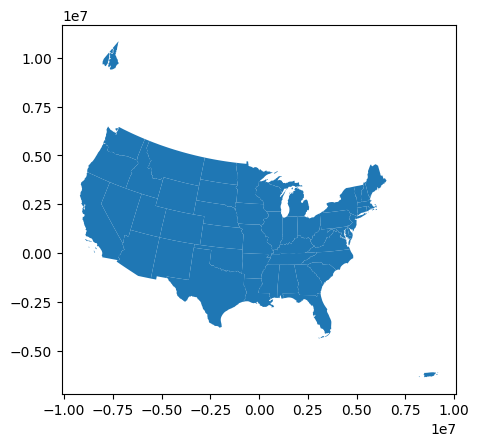

In [100]:
usa_shp.plot()

In [101]:
usa_shp['NAME'].unique()

array(['Texas', 'California', 'Kentucky', 'Georgia', 'Wisconsin',
       'Oregon', 'Virginia', 'Tennessee', 'Louisiana', 'New York',
       'Michigan', 'Idaho', 'Florida', 'Alaska', 'Montana', 'Minnesota',
       'Nebraska', 'Washington', 'Ohio', 'Illinois', 'Missouri', 'Iowa',
       'South Dakota', 'Arkansas', 'Mississippi', 'Colorado',
       'North Carolina', 'Utah', 'Oklahoma', 'Wyoming', 'West Virginia',
       'Indiana', 'Massachusetts', 'Nevada', 'Connecticut',
       'District of Columbia', 'Rhode Island', 'Alabama', 'Puerto Rico',
       'South Carolina', 'Maine', 'Hawaii', 'Arizona', 'New Mexico',
       'Maryland', 'Delaware', 'Pennsylvania', 'Kansas', 'Vermont',
       'New Jersey', 'North Dakota', 'New Hampshire'], dtype=object)

In [102]:
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

usa_shp['State Abbrev'] = usa_shp['NAME'].map(us_state_abbrev)


In [11]:
usa_shp.head()

,FID,NAME,Obesity,SHAPE_Leng,SHAPE_Area,geometry,State Abbrev
0,1,Texas,32.4,1.540832e+07,7.672329e+12,"POLYGON ((-4733454.413 -1236806.965, -4731845....",TX
1,2,California,24.2,1.451870e+07,5.327809e+12,"MULTIPOLYGON (((-8404411.041 284710.501, -8366...",CA
2,3,Kentucky,34.6,6.346699e+06,1.128830e+12,"POLYGON ((628609.492 -31311.293, 647687.562 -3...",KY
3,4,Georgia,30.7,5.795596e+06,1.652980e+12,"POLYGON ((1801578.384 -601112.983, 1840793.866...",GA
4,5,Wisconsin,30.7,6.806782e+06,1.567816e+12,"MULTIPOLYGON (((1343492.25 3192768.205, 136859...",WI


In [103]:
merged_customre_rev = usa_shp.merge(cust_rev, left_on='State Abbrev', right_on='State', how='left')
print(merged_customre_rev.head())

   FID   NAME  Obesity    SHAPE_Leng    SHAPE_Area  \
0    1  Texas     32.4  1.540832e+07  7.672329e+12   
1    1  Texas     32.4  1.540832e+07  7.672329e+12   
2    1  Texas     32.4  1.540832e+07  7.672329e+12   
3    1  Texas     32.4  1.540832e+07  7.672329e+12   
4    1  Texas     32.4  1.540832e+07  7.672329e+12   

                                            geometry State Abbrev  \
0  POLYGON ((-4733454.413 -1236806.965, -4731845....           TX   
1  POLYGON ((-4733454.413 -1236806.965, -4731845....           TX   
2  POLYGON ((-4733454.413 -1236806.965, -4731845....           TX   
3  POLYGON ((-4733454.413 -1236806.965, -4731845....           TX   
4  POLYGON ((-4733454.413 -1236806.965, -4731845....           TX   

  Date received                  Sub-product  \
0    07/29/2013             Checking account   
1    07/29/2013  (CD) Certificate of deposit   
2    07/31/2013             Checking account   
3    07/22/2013             Checking account   
4    07/24/2013     

In [13]:
cust_rev.describe(include='all')

,Date received,Sub-product,Issue,Consumer complaint narrative,Company public response,Company,State
count,84811,84811,84811,13860,22991,84811,83262
unique,1864,5,5,13831,10,451,62
top,08/12/2015,Checking account,"Account opening, closing, or management","On at least XXXX previous occasions, I request...",Company has responded to the consumer and the ...,Bank of America,CA
freq,162,58197,37349,5,13042,13679,11936


In [14]:
merged_customre_rev['Sentiment'] = merged_customre_rev['Consumer complaint narrative'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [15]:
merged_customre_rev['Date received'] = pd.to_datetime(merged_customre_rev['Date received'])
merged_customre_rev['Year'] = merged_customre_rev['Date received'].dt.year
merged_customre_rev['Month'] = merged_customre_rev['Date received'].dt.month

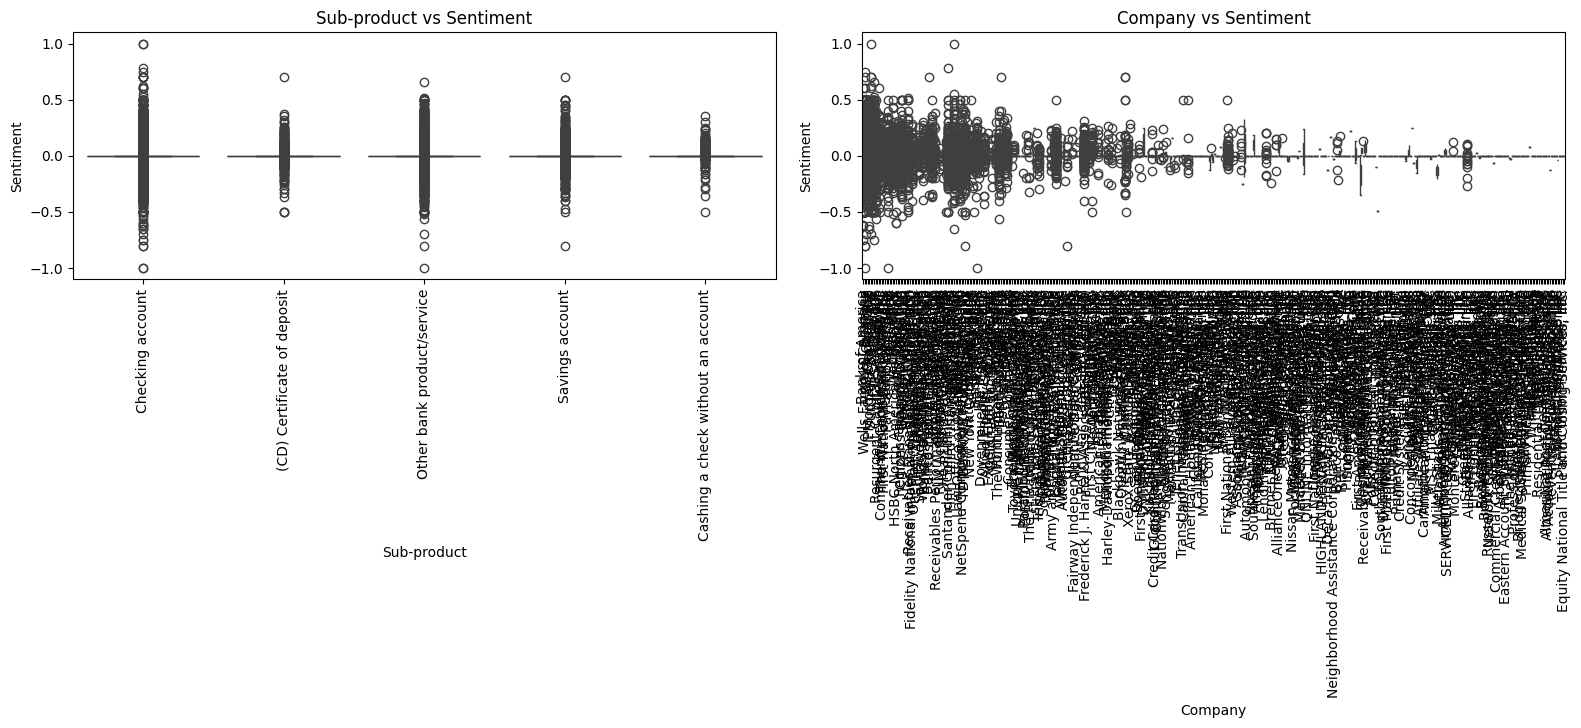

In [16]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Sub-product', y='Sentiment', data=merged_customre_rev)
plt.xticks(rotation=90)
plt.title('Sub-product vs Sentiment')


plt.subplot(2, 2, 2)
sns.boxplot(x='Company', y='Sentiment', data=merged_customre_rev)
plt.xticks(rotation=90)
plt.title('Company vs Sentiment')

plt.tight_layout()
plt.show()

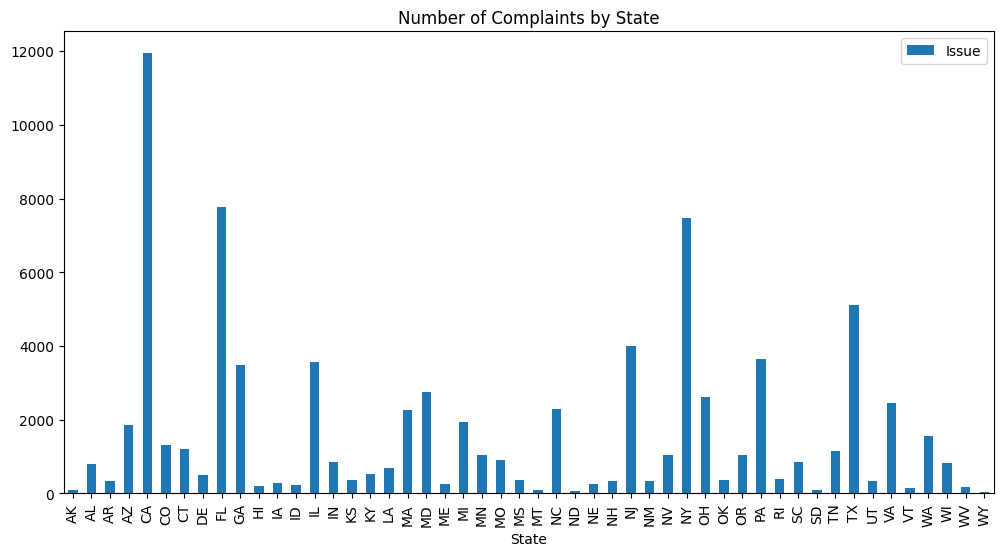

In [17]:
state_complaints = merged_customre_rev.groupby('State')['Issue'].count().reset_index()
state_complaints.plot(kind='bar', x='State', y='Issue', figsize=(12, 6), title='Number of Complaints by State')
plt.show()

In [18]:
complaints_by_year = merged_customre_rev.groupby(['NAME', 'Year'])['Issue'].count().reset_index()


fig = px.line(
    complaints_by_year,
    x='Year',
    y='Issue',
    color='NAME',
    title='Interactive Time-Based Analysis: Complaints per State by Year',
    labels={'Issue': 'Number of Complaints'},
    hover_data={'NAME': True}
)


fig.update_traces(mode='lines+markers',
                  hovertemplate='State: %{customdata[0]}<br>Complaints: %{y}<br>Year: %{x}')
fig.update_layout(legend_title_text='State')

fig.show()

<ipython-input-19-385842001fb1>:19: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



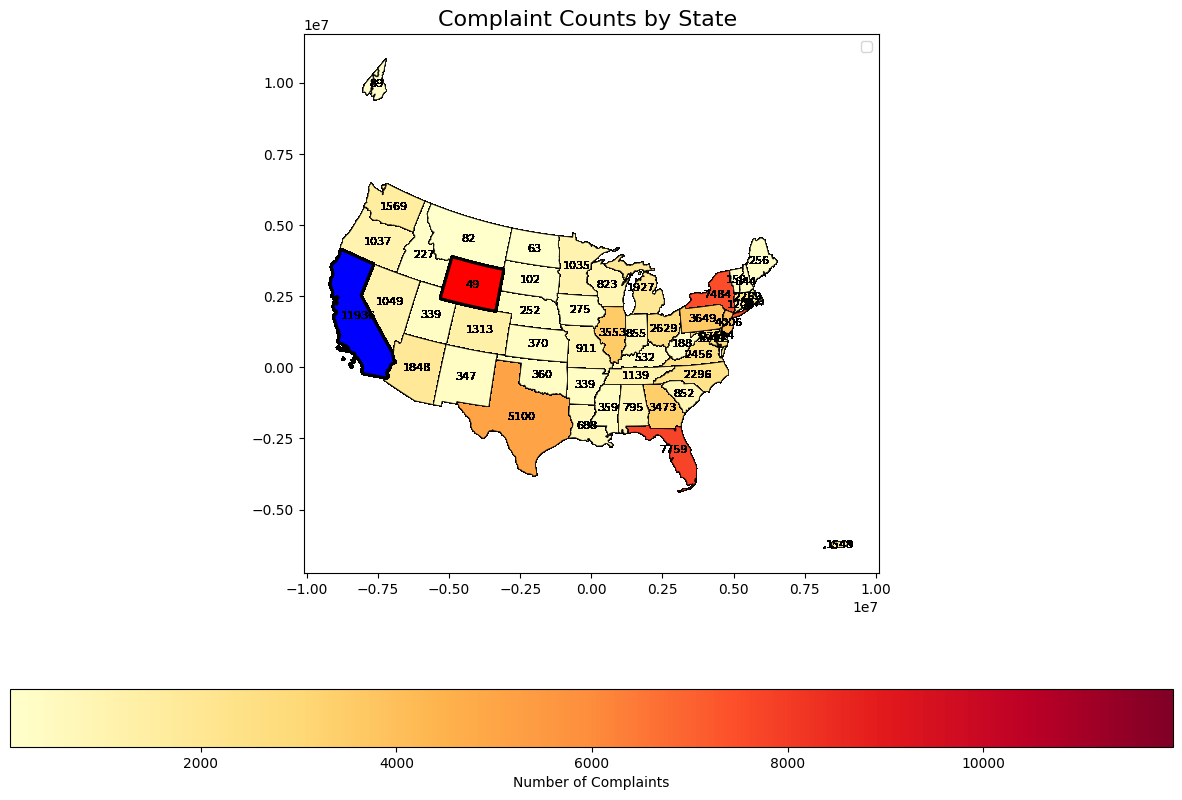

In [19]:
complaint_counts = merged_customre_rev.groupby('NAME')['Issue'].count().reset_index(name='Complaint Count')
merged_customre_rev = merged_customre_rev.merge(complaint_counts, left_on='NAME', right_on='NAME', how='left')

merged_customre_rev['centroid'] = merged_customre_rev.geometry.centroid
fig, ax = plt.subplots(1, figsize=(15, 10))


merged_customre_rev.plot(ax=ax, column='Complaint Count', cmap='YlOrRd', edgecolor='black', linewidth=0.5,
                          legend=True, legend_kwds={'label': "Number of Complaints", 'orientation': "horizontal"})

highest_state = merged_customre_rev.loc[merged_customre_rev['Complaint Count'].idxmax()]
lowest_state = merged_customre_rev.loc[merged_customre_rev['Complaint Count'].idxmin()]


merged_customre_rev[merged_customre_rev['NAME'] == highest_state['NAME']].plot(ax=ax, color='blue', edgecolor='black', linewidth=2, label='Highest Complaints')
merged_customre_rev[merged_customre_rev['NAME'] == lowest_state['NAME']].plot(ax=ax, color='red', edgecolor='black', linewidth=2, label='Lowest Complaints')

ax.set_title('Complaint Counts by State ', fontsize=16)
ax.legend()


for idx, row in merged_customre_rev.iterrows():
    if row['centroid'] is not None:
        ax.text(row['centroid'].x, row['centroid'].y, str(row['Complaint Count']), fontsize=8, ha='center', va='center')

plt.show()

##### poverty with customer complaint

In [74]:
import gdown

file_id = '1ZYayXp-qkanpU9H1E_RRUgubOUO5b_nP'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'POVERTY_2013-2017.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ZYayXp-qkanpU9H1E_RRUgubOUO5b_nP
To: /content/POVERTY_2013-2017.csv
100%|██████████| 5.33k/5.33k [00:00<00:00, 2.61MB/s]


'POVERTY_2013-2017.csv'

In [75]:
poverty = pd.read_csv('POVERTY_2013-2017.csv', skiprows=[1])
poverty.head()

,Geography Type Description,Geography Name,Sits in State,GeoID,Formatted GeoID,People in Poverty,Data Time Period,Geographic Vintage,Data Source,Selected Location
0,State,Alabama,AL,1,"=""01""",849699.0,2013-2017,NaN,Census,United States
1,State,Alaska,AK,2,"=""02""",73380.0,2013-2017,NaN,Census,United States
2,State,Arizona,AZ,4,"=""04""",1128046.0,2013-2017,NaN,Census,United States
3,State,Arkansas,AR,5,"=""05""",524211.0,2013-2017,NaN,Census,United States
4,State,California,CA,6,"=""06""",5773408.0,2013-2017,NaN,Census,United States


In [76]:
print("Null values per column:")
print(poverty.isnull().sum())

Null values per column:
Geography Type Description     0
Geography Name                 0
Sits in State                  0
GeoID                          0
Formatted GeoID                0
People in Poverty              4
Data Time Period               0
Geographic Vintage            56
Data Source                    0
Selected Location              0
dtype: int64


In [77]:
poverty = poverty.rename(columns={
    'Geography Name': 'State',
    'People in Poverty': 'Poverty Count'
})

In [78]:
poverty.columns

Index(['Geography Type Description', 'State', 'Sits in State', 'GeoID',
       'Formatted GeoID', 'Poverty Count', 'Data Time Period',
       'Geographic Vintage', 'Data Source', 'Selected Location'],
      dtype='object')

In [79]:
merged_review_with_poverty =  usa_shp.merge(poverty, left_on='State Abbrev', right_on='Sits in State', how='left')

In [80]:
merged_review_with_poverty.head()

,FID,NAME,Obesity,SHAPE_Leng,SHAPE_Area,geometry,State Abbrev,Geography Type Description,State,Sits in State,GeoID,Formatted GeoID,Poverty Count,Data Time Period,Geographic Vintage,Data Source,Selected Location
0,1,Texas,32.4,1.540832e+07,7.672329e+12,"POLYGON ((-4733454.413 -1236806.965, -4731845....",TX,State,Texas,TX,48.0,"=""48""",4291384.0,2013-2017,NaN,Census,United States
1,2,California,24.2,1.451870e+07,5.327809e+12,"MULTIPOLYGON (((-8404411.041 284710.501, -8366...",CA,State,California,CA,6.0,"=""06""",5773408.0,2013-2017,NaN,Census,United States
2,3,Kentucky,34.6,6.346699e+06,1.128830e+12,"POLYGON ((628609.492 -31311.293, 647687.562 -3...",KY,State,Kentucky,KY,21.0,"=""21""",783586.0,2013-2017,NaN,Census,United States
3,4,Georgia,30.7,5.795596e+06,1.652980e+12,"POLYGON ((1801578.384 -601112.983, 1840793.866...",GA,State,Georgia,GA,13.0,"=""13""",1679030.0,2013-2017,NaN,Census,United States
4,5,Wisconsin,30.7,6.806782e+06,1.567816e+12,"MULTIPOLYGON (((1343492.25 3192768.205, 136859...",WI,State,Wisconsin,WI,55.0,"=""55""",692719.0,2013-2017,NaN,Census,United States


In [27]:
!pip install mapclassify
import mapclassify

In [104]:
complaint_counts =merged_customre_rev.groupby('NAME')['Issue'].count().reset_index(name='Complaint Count')
complaint_counts

,NAME,Complaint Count
0,Alabama,795
1,Alaska,89
2,Arizona,1848
3,Arkansas,339
4,California,11936
5,Colorado,1313
6,Connecticut,1206
7,Delaware,514
8,District of Columbia,1549
9,Florida,7759


In [106]:
merged_cust_rev_new=  usa_shp.merge(complaint_counts, on='NAME', how='left')
merged_cust_rev_new

,FID,NAME,Obesity,SHAPE_Leng,SHAPE_Area,geometry,State Abbrev,Complaint Count
0,1,Texas,32.4,1.540832e+07,7.672329e+12,"POLYGON ((-4733454.413 -1236806.965, -4731845....",TX,5100
1,2,California,24.2,1.451870e+07,5.327809e+12,"MULTIPOLYGON (((-8404411.041 284710.501, -8366...",CA,11936
2,3,Kentucky,34.6,6.346699e+06,1.128830e+12,"POLYGON ((628609.492 -31311.293, 647687.562 -3...",KY,532
3,4,Georgia,30.7,5.795596e+06,1.652980e+12,"POLYGON ((1801578.384 -601112.983, 1840793.866...",GA,3473
4,5,Wisconsin,30.7,6.806782e+06,1.567816e+12,"MULTIPOLYGON (((1343492.25 3192768.205, 136859...",WI,823
5,6,Oregon,30.1,7.976011e+06,3.178446e+12,"POLYGON ((-8738852.807 4494875.3, -8699815.078...",OR,1037
6,7,Virginia,29.2,7.710804e+06,1.158804e+12,"MULTIPOLYGON (((4572650.16 462219.139, 4579424...",VA,2456
7,8,Tennessee,33.8,6.350377e+06,1.177054e+12,"POLYGON ((395203.47 -590412.195, 405885.314 -5...",TN,1139
8,9,Louisiana,36.2,7.383857e+06,1.355094e+12,"POLYGON ((-773587.051 -1398799.228, -771519.68...",LA,688
9,10,New York,25.0,7.981383e+06,1.411441e+12,"MULTIPOLYGON (((5476066.945 2106152.015, 55003...",NY,7484


In [107]:
merged_customre_revc = merged_cust_rev_new.copy()
merged_customre_revc["geometry"] = merged_customre_revc["geometry"].centroid

In [128]:
highest_complaints_state = merged_review_with_poverty_agg.loc[merged_review_with_poverty_agg['Complaint Count'].idxmax()]
highest_poverty_state = merged_review_with_poverty_agg.loc[merged_review_with_poverty_agg['Poverty Count'].idxmax()]
highest_complaints_state

,4
NAME,California
Complaint Count,11936
Poverty Count,5773408.0
geometry,"MULTIPOLYGON (((Infinity Infinity, Infinity In..."


In [125]:
review_with_poverty_cal=merged_cust_rev_new.query("NAME=='California'")

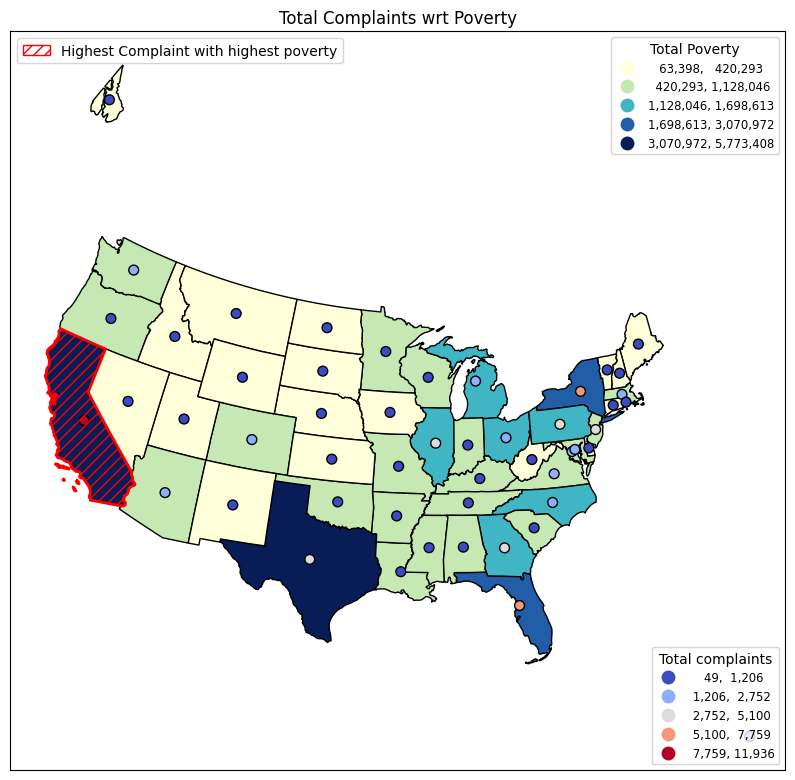

In [127]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, figsize=(10, 14))

merged_review_with_poverty.plot(
    ax=ax,
    column='Poverty Count',
    legend=True,
    cmap='YlGnBu',
    scheme='natural_breaks',
    k=5,
    edgecolor='black',
    linewidth=1,
    legend_kwds={
        "fmt": "{:,.0f}",
        'loc': 'upper right',
        'title_fontsize': 'medium',
        'fontsize': 'small'
    }
)


l1 = ax.get_legend()
l1.set_title('Total Poverty')
ax.set_xticks([])
ax.set_yticks([])


merged_customre_revc.plot(
    ax=ax,
    column='Complaint Count',
    legend=True,
    cmap='coolwarm',
    scheme='natural_breaks',
    k=5,
    edgecolor='black',
    linewidth=1,
    markersize=50,
    legend_kwds={
        "fmt": "{:,.0f}",
        'loc': 'lower right',
        'title_fontsize': 'medium',
        'fontsize': 'small'
    }
)

l2 = ax.get_legend()
l2.set_title('Total complaints')


review_with_poverty_cal.plot(ax=ax, edgecolor='red', linewidth=2, facecolor="none", alpha=1, hatch='///')
blue_patch = mpatches.Patch(edgecolor='red', facecolor='none', hatch='///', label='Highest Complaint with highest poverty')
plt.legend(handles=[blue_patch], loc='upper left')

ax.set_title("Total Complaints wrt Poverty")
ax.add_artist(l1)
ax.add_artist(l2)

plt.show()


##### Unemployement with customer complaint review

In [118]:
file_links = [
    'https://drive.google.com/uc?id=1xlKh4K830_f6CYEI_IrmNge9lURcGFOX',
    'https://drive.google.com/uc?id=1G55H-SKrP4AEdby2aYCQChml-D2EbueP',
    'https://drive.google.com/uc?id=1mL_LYd_k3KgG0XJyiQu_nlJEpfXEmd6X',
    'https://drive.google.com/uc?id=1zNjhE0ccN0NUxnbqrPPI1dJhVi3r9gAo',
    'https://drive.google.com/uc?id=1i8tWRbXYosBoRJ9A1kFFcXgz8NTnLPQZ'
]

unemployment = pd.concat([pd.read_csv(link, skiprows=[1]) for link in file_links], ignore_index=True)
print(unemployment.head())

  Geography Type Description Geography Name Sits in State  GeoID  \
0                      State        Alabama            AL      1   
1                      State         Alaska            AK      2   
2                      State        Arizona            AZ      4   
3                      State       Arkansas            AR      5   
4                      State     California            CA      6   

  Formatted GeoID  Number Unemployed  Data Time Period  Geographic Vintage  \
0           ="01"           159274.0              2013                 NaN   
1           ="02"            25440.0              2013                 NaN   
2           ="04"           239213.0              2013                 NaN   
3           ="05"            94000.0              2013                 NaN   
4           ="06"          1677544.0              2013                 NaN   

  Data Source Selected Location  
0         BLS     United States  
1         BLS     United States  
2         BLS     Un

In [119]:
print(unemployment.columns)

Index(['Geography Type Description', 'Geography Name', 'Sits in State',
       'GeoID', 'Formatted GeoID', 'Number Unemployed', 'Data Time Period',
       'Geographic Vintage', 'Data Source', 'Selected Location'],
      dtype='object')


In [121]:
unemployment = unemployment[['Geography Name', 'Number Unemployed']]
unemployment.columns = ['State', 'Unemployed']

In [122]:
grouped_unemployment = unemployment.groupby('State', as_index=False).agg({'Unemployed': 'sum'})
print(grouped_unemployment.head())

            State  Unemployed
0         Alabama    663293.0
1          Alaska    120143.0
2  American Samoa         0.0
3         Arizona    983389.0
4        Arkansas    342404.0


In [124]:
merged_unemp_state = usa_shp.merge(grouped_unemployment, how='left', left_on='NAME', right_on='State')
merged_unemp_state

,FID,NAME,Obesity,SHAPE_Leng,SHAPE_Area,geometry,State Abbrev,State,Unemployed
0,1,Texas,32.4,1.540832e+07,7.672329e+12,"POLYGON ((-4733454.413 -1236806.965, -4731845....",TX,Texas,3274290.0
1,2,California,24.2,1.451870e+07,5.327809e+12,"MULTIPOLYGON (((-8404411.041 284710.501, -8366...",CA,California,6240362.0
2,3,Kentucky,34.6,6.346699e+06,1.128830e+12,"POLYGON ((628609.492 -31311.293, 647687.562 -3...",KY,Kentucky,595047.0
3,4,Georgia,30.7,5.795596e+06,1.652980e+12,"POLYGON ((1801578.384 -601112.983, 1840793.866...",GA,Georgia,1524269.0
4,5,Wisconsin,30.7,6.806782e+06,1.567816e+12,"MULTIPOLYGON (((1343492.25 3192768.205, 136859...",WI,Wisconsin,731320.0
5,6,Oregon,30.1,7.976011e+06,3.178446e+12,"POLYGON ((-8738852.807 4494875.3, -8699815.078...",OR,Oregon,568543.0
6,7,Virginia,29.2,7.710804e+06,1.158804e+12,"MULTIPOLYGON (((4572650.16 462219.139, 4579424...",VA,Virginia,969381.0
7,8,Tennessee,33.8,6.350377e+06,1.177054e+12,"POLYGON ((395203.47 -590412.195, 405885.314 -5...",TN,Tennessee,879567.0
8,9,Louisiana,36.2,7.383857e+06,1.355094e+12,"POLYGON ((-773587.051 -1398799.228, -771519.68...",LA,Louisiana,641088.0
9,10,New York,25.0,7.981383e+06,1.411441e+12,"MULTIPOLYGON (((5476066.945 2106152.015, 55003...",NY,New York,2770501.0


In [132]:
highest_unemployement_state = merged_unemp_state.loc[merged_unemp_state['Unemployed'].idxmax()]


,1
FID,2
NAME,California
Obesity,24.2
SHAPE_Leng,14518698.456672
SHAPE_Area,5327809415403.009766
geometry,MULTIPOLYGON (((-8404411.040730169 284710.5008...
State Abbrev,CA
State,California
Unemployed,6240362.0


In [133]:
review_with_unemp_cal=merged_cust_rev_new.query("NAME=='California'")

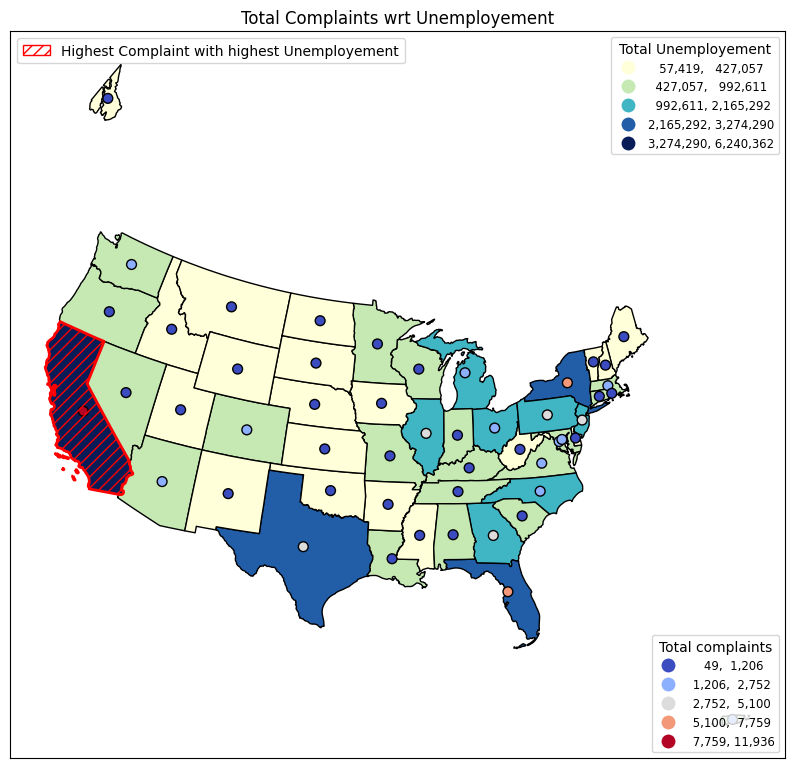

In [134]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, figsize=(10, 14))

merged_unemp_state.plot(
    ax=ax,
    column='Unemployed',
    legend=True,
    cmap='YlGnBu',
    scheme='natural_breaks',
    k=5,
    edgecolor='black',
    linewidth=1,
    legend_kwds={
        "fmt": "{:,.0f}",
        'loc': 'upper right',
        'title_fontsize': 'medium',
        'fontsize': 'small'
    }
)


l1 = ax.get_legend()
l1.set_title('Total Unemployement')
ax.set_xticks([])
ax.set_yticks([])


merged_customre_revc.plot(
    ax=ax,
    column='Complaint Count',
    legend=True,
    cmap='coolwarm',
    scheme='natural_breaks',
    k=5,
    edgecolor='black',
    linewidth=1,
    markersize=50,
    legend_kwds={
        "fmt": "{:,.0f}",
        'loc': 'lower right',
        'title_fontsize': 'medium',
        'fontsize': 'small'
    }
)

l2 = ax.get_legend()
l2.set_title('Total complaints')


review_with_poverty_cal.plot(ax=ax, edgecolor='red', linewidth=2, facecolor="none", alpha=1, hatch='///')
blue_patch = mpatches.Patch(edgecolor='red', facecolor='none', hatch='///', label='Highest Complaint with highest Unemployement')
plt.legend(handles=[blue_patch], loc='upper left')

ax.set_title("Total Complaints wrt Unemployement")
ax.add_artist(l1)
ax.add_artist(l2)

plt.show()


In [136]:
merged_pov_ump = merged_unemp_state.merge(merged_review_with_poverty, how='left', on ='NAME')
merged_pov_ump

,FID_x,NAME,Obesity_x,SHAPE_Leng_x,SHAPE_Area_x,geometry_x,State Abbrev_x,State_x,Unemployed,FID_y,...,Geography Type Description,State_y,Sits in State,GeoID,Formatted GeoID,Poverty Count,Data Time Period,Geographic Vintage,Data Source,Selected Location
0,1,Texas,32.4,1.540832e+07,7.672329e+12,"POLYGON ((-4733454.413 -1236806.965, -4731845....",TX,Texas,3274290.0,1,...,State,Texas,TX,48.0,"=""48""",4291384.0,2013-2017,NaN,Census,United States
1,2,California,24.2,1.451870e+07,5.327809e+12,"MULTIPOLYGON (((-8404411.041 284710.501, -8366...",CA,California,6240362.0,2,...,State,California,CA,6.0,"=""06""",5773408.0,2013-2017,NaN,Census,United States
2,3,Kentucky,34.6,6.346699e+06,1.128830e+12,"POLYGON ((628609.492 -31311.293, 647687.562 -3...",KY,Kentucky,595047.0,3,...,State,Kentucky,KY,21.0,"=""21""",783586.0,2013-2017,NaN,Census,United States
3,4,Georgia,30.7,5.795596e+06,1.652980e+12,"POLYGON ((1801578.384 -601112.983, 1840793.866...",GA,Georgia,1524269.0,4,...,State,Georgia,GA,13.0,"=""13""",1679030.0,2013-2017,NaN,Census,United States
4,5,Wisconsin,30.7,6.806782e+06,1.567816e+12,"MULTIPOLYGON (((1343492.25 3192768.205, 136859...",WI,Wisconsin,731320.0,5,...,State,Wisconsin,WI,55.0,"=""55""",692719.0,2013-2017,NaN,Census,United States
5,6,Oregon,30.1,7.976011e+06,3.178446e+12,"POLYGON ((-8738852.807 4494875.3, -8699815.078...",OR,Oregon,568543.0,6,...,State,Oregon,OR,41.0,"=""41""",587248.0,2013-2017,NaN,Census,United States
6,7,Virginia,29.2,7.710804e+06,1.158804e+12,"MULTIPOLYGON (((4572650.16 462219.139, 4579424...",VA,Virginia,969381.0,7,...,State,Virginia,VA,51.0,"=""51""",906838.0,2013-2017,NaN,Census,United States
7,8,Tennessee,33.8,6.350377e+06,1.177054e+12,"POLYGON ((395203.47 -590412.195, 405885.314 -5...",TN,Tennessee,879567.0,8,...,State,Tennessee,TN,47.0,"=""47""",1072360.0,2013-2017,NaN,Census,United States
8,9,Louisiana,36.2,7.383857e+06,1.355094e+12,"POLYGON ((-773587.051 -1398799.228, -771519.68...",LA,Louisiana,641088.0,9,...,State,Louisiana,LA,22.0,"=""22""",887574.0,2013-2017,NaN,Census,United States
9,10,New York,25.0,7.981383e+06,1.411441e+12,"MULTIPOLYGON (((5476066.945 2106152.015, 55003...",NY,New York,2770501.0,10,...,State,New York,NY,36.0,"=""36""",2908471.0,2013-2017,NaN,Census,United States


In [144]:
import plotly.express as px

# Create a scatter plot
fig = px.scatter(merged_pov_ump,
                 x='Poverty Count',
                 y='Unemployed',
                 color='State_x',
                 hover_name='State_x',
                 title='Unemployment vs. Poverty by State',
                 labels={'Poverty': 'Poverty Level', 'Unemployment': 'Unemployment Rate'})

# Show the plot
fig.show()
